# **Import necessary libraries**

In [45]:
!pip install shutup #optional :>
import shutup
shutup.please()

In [46]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re
import datetime #datetime data type
from collections import Counter
from pandas.plotting import scatter_matrix
%matplotlib inline
sb.set()

# **Individual Exploratory Data Analysis**

# ***Trumps tweets***

In [47]:
trumpTweet = pd.read_csv('https://raw.githubusercontent.com/calebczh/Trump-Tweets-and-Financial-Market-Relationship/main/Datasets/clean_trump.csv')
trumpTweet['date'] = pd.to_datetime(trumpTweet['date']) #setting date to datetime data type
trumpTweet = trumpTweet.set_index('date')
trumpTweet = trumpTweet.drop(pd.Timestamp('2009-05-04 00:00:00')) #removing tweets on dates that we do not have %increse data of stock value, by datetime index
trumpTweet

,content,retweets,favorites,mentions,hashtags,time
date,,,,,,
2009-05-08,Donald Trump reads Top Ten Financial Tips on L...,13,19,NaN,NaN,08:38:08
2009-05-08,New Blog Post: Celebrity Apprentice Finale and...,11,26,NaN,NaN,15:40:15
2009-05-12,"""My persona will never be that of a wallflower...",1375,1945,NaN,NaN,09:07:28
2009-05-12,"Miss USA Tara Conner will not be fired - ""I've...",29,28,NaN,NaN,14:21:55
2009-05-13,Listen to an interview with Donald Trump discu...,15,16,NaN,NaN,12:38:28
...,...,...,...,...,...,...
2020-06-16,True! …,26783,154978,NaN,NaN,20:16:20
2020-06-16,A GREAT woman. Her son is looking down from he...,26468,112140,NaN,NaN,21:31:11
2020-06-16,96% Approval Rating in the Republican Party. T...,44472,313534,NaN,NaN,22:27:56


In [48]:
trumpTweet['mentions'] = trumpTweet['mentions'].astype("string")
trumpTweet.dtypes

content      object
retweets      int64
favorites     int64
mentions     string
hashtags     object
time         object
dtype: object

Text(0.5, 1.0, "Trump's tweets count with time")

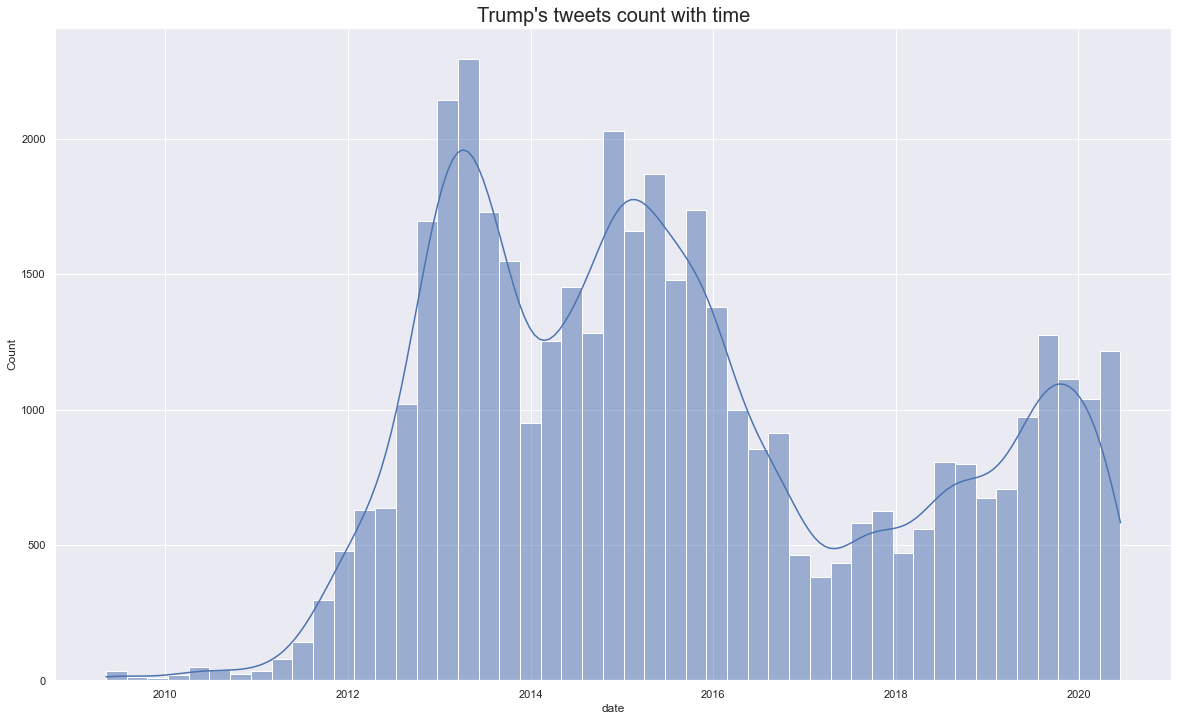

In [49]:
f = plt.figure(figsize=(20, 12))
sb.histplot(data = trumpTweet.index, kde = True)  #histogram showing usage frequency of Trump's tweets
plt.title("Trump's tweets count with time", fontsize=20)

Text(0.5, 1.0, "Retweet/Favorite count of Trump's tweets")

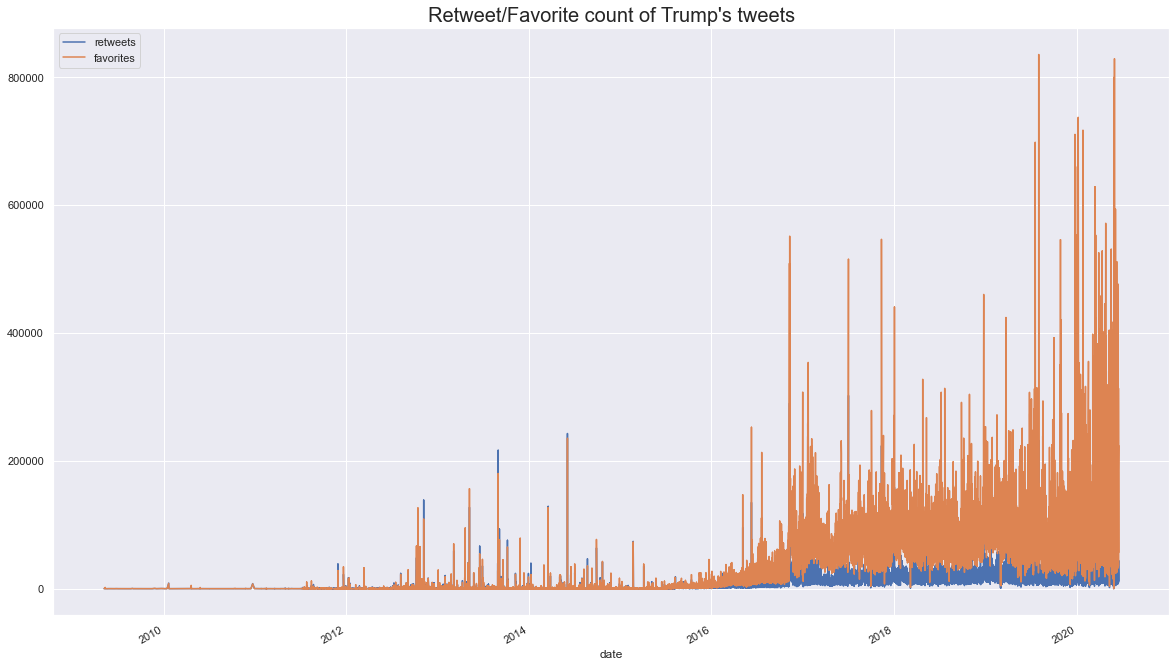

In [50]:
trumpTweet['retweets'].plot(label = 'retweets', figsize = (20,12)) #plotting retweets/favorites count against time
trumpTweet['favorites'].plot(label = 'favorites', figsize = (20,12)) 
plt.legend()
plt.title("Retweet/Favorite count of Trump's tweets",  fontsize=20)

As the amount of retweets and favorites are very volatile, we can use average in a number of days to better see a trend in the counts.

Text(0.5, 1.0, "Retweet/Favorite average count of Trump's tweets")

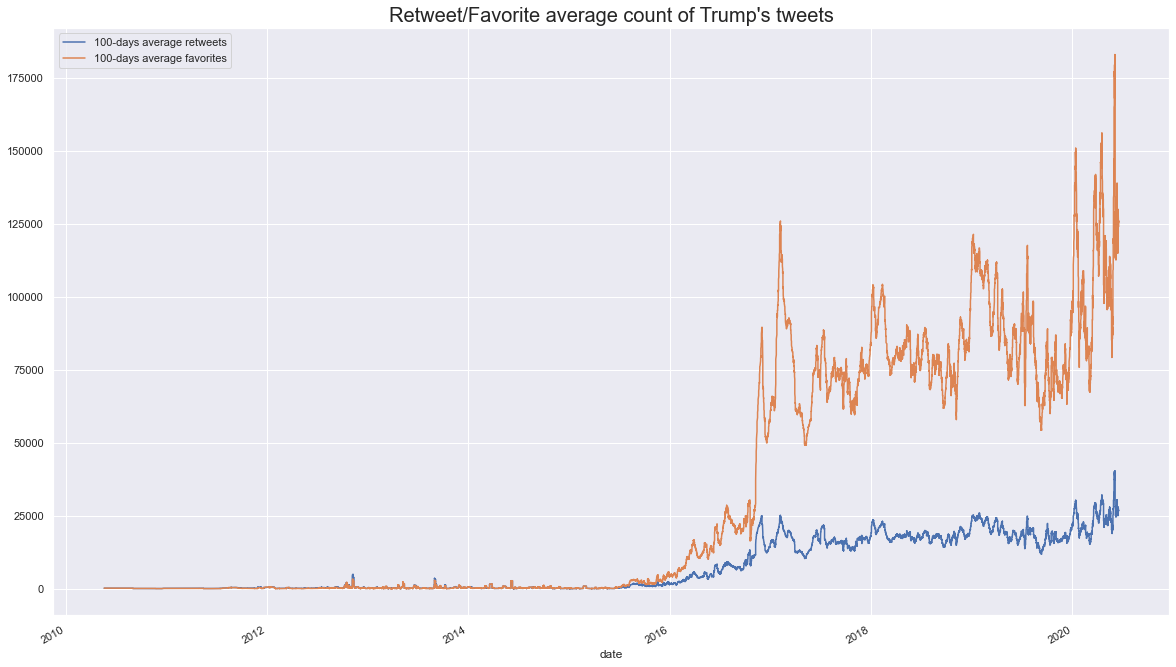

In [51]:
trumpTweet['RA100'] = trumpTweet['retweets'].rolling(100).mean()  #taking 100 days average to observe the trend better
trumpTweet['FA100'] = trumpTweet['favorites'].rolling(100).mean()
trumpTweet['RA100'].plot(label = '100-days average retweets', figsize = (20,12)) #plotting retweets/favorites count against time
trumpTweet['FA100'].plot(label = '100-days average favorites', figsize = (20,12)) 
plt.legend()
plt.title("Retweet/Favorite average count of Trump's tweets",  fontsize=20)

### Some insights
- We can see that both retweets and favourites count started increasing sometime before 2016. To be exact, we believe it is due to the formally launch of the 2016 presidential campaign of Donald Trump  on June 16, 2015.

- There's a another drastic increase near 2017, which we believe is due to Donald Trump winning the US Presidential Election held on 8 November 2016.

- There is a steady increase of Tweet count from the time that Donald Trump take over the office in 2017.

### Some actions
- In view of his influence on Twitter as assessed from his favorite/retweets count, We will focus on the period of presidency, namely 2017 - 2021. The amount of Twitter usage increased gradually in this period. There is also a larger possibility that his tweets could have influeced the performance of the market with the president role.

In [52]:
PTrump = trumpTweet['2017-01-20':] #tweets after the start of Trump's presidency period
PTrump

,content,retweets,favorites,mentions,hashtags,time,RA100,FA100
date,,,,,,,,
2017-01-20,It all begins today! I will see you at 11:00 A...,59617,238180,<NA>,NaN,06:31:53,15284.63,69666.28
2017-01-20,Today we are not merely transferring power fro...,17022,97230,<NA>,NaN,11:51:25,15281.89,70053.62
2017-01-20,"power from Washington, D.C. and giving it back...",15441,80281,<NA>,#InaugurationDay,11:51:58,15279.96,70369.04
2017-01-20,What truly matters is not which party controls...,36987,161112,<NA>,NaN,11:52:45,15470.17,71364.41
2017-01-20,"January 20th 2017, will be remembered as the d...",56418,201434,<NA>,NaN,11:53:17,15874.75,72814.62
...,...,...,...,...,...,...,...,...
2020-06-16,True! …,26783,154978,<NA>,NaN,20:16:20,26772.70,124367.27
2020-06-16,A GREAT woman. Her son is looking down from he...,26468,112140,<NA>,NaN,21:31:11,26663.54,123914.91
2020-06-16,96% Approval Rating in the Republican Party. T...,44472,313534,<NA>,NaN,22:27:56,26754.60,125595.68


[Text(0, 0, '@FoxNews'),
 Text(1, 0, '@foxandfriends'),
 Text(2, 0, '@WhiteHouse'),
 Text(3, 0, '@CNN'),
 Text(4, 0, '@nytimes'),
 Text(5, 0, '@LouDobbs'),
 Text(6, 0, '@FLOTUS'),
 Text(7, 0, '@seanhannity'),
 Text(8, 0, '@MariaBartiromo'),
 Text(9, 0, '@TuckerCarlson'),
 Text(10, 0, '@IngrahamAngle'),
 Text(11, 0, '@VP'),
 Text(12, 0, '@OANN'),
 Text(13, 0, '@FEMA'),
 Text(14, 0, '@JudgeJeanine'),
 Text(15, 0, '@washingtonpost'),
 Text(16, 0, '@EmmanuelMacron'),
 Text(17, 0, '@FoxBusiness'),
 Text(18, 0, '@BreitbartNews'),
 Text(19, 0, '@EddieRispone')]

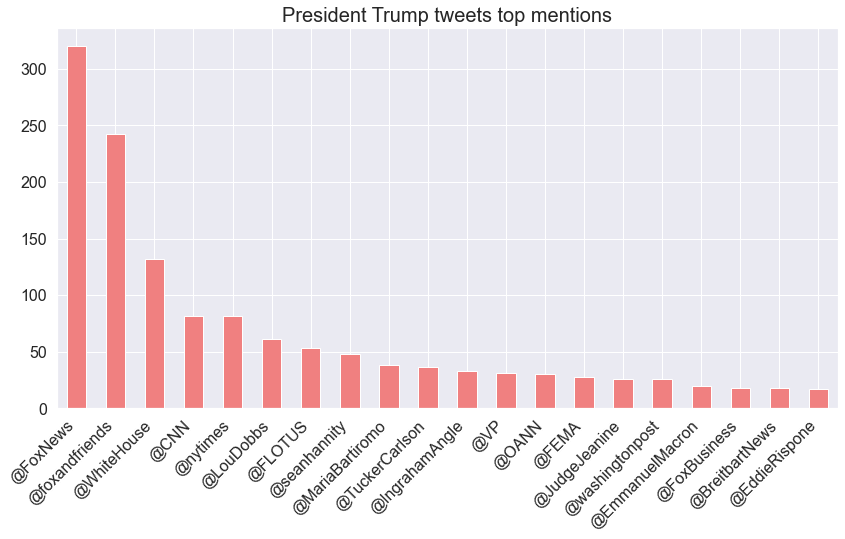

In [53]:
import itertools
a = PTrump[pd.notna(PTrump['mentions']) == True]
a = list(itertools.chain(a['mentions'].map(lambda x: x.split(',') )))
flat_list = [item for sublist in a for item in sublist]
pd.Series(flat_list).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('President Trump tweets top mentions', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)

[Text(0, 0, '#MAGA'),
 Text(1, 0, '#MAGApic'),
 Text(2, 0, '#KAG2020pic'),
 Text(3, 0, '#MAGAhttps'),
 Text(4, 0, '#2A'),
 Text(5, 0, '#USApic'),
 Text(6, 0, '#1'),
 Text(7, 0, '#FakeNews'),
 Text(8, 0, '#UNGApic'),
 Text(9, 0, '#AmericaFirstpic'),
 Text(10, 0, '#MAGARally'),
 Text(11, 0, '#AmericaFirst'),
 Text(12, 0, '#2020'),
 Text(13, 0, '#HurricaneHarvey'),
 Text(14, 0, '#LESMpic'),
 Text(15, 0, '#USWomensOpen'),
 Text(16, 0, '#UNGA'),
 Text(17, 0, '#G7Summit'),
 Text(18, 0, '#KAG2020'),
 Text(19, 0, '#G20Summit')]

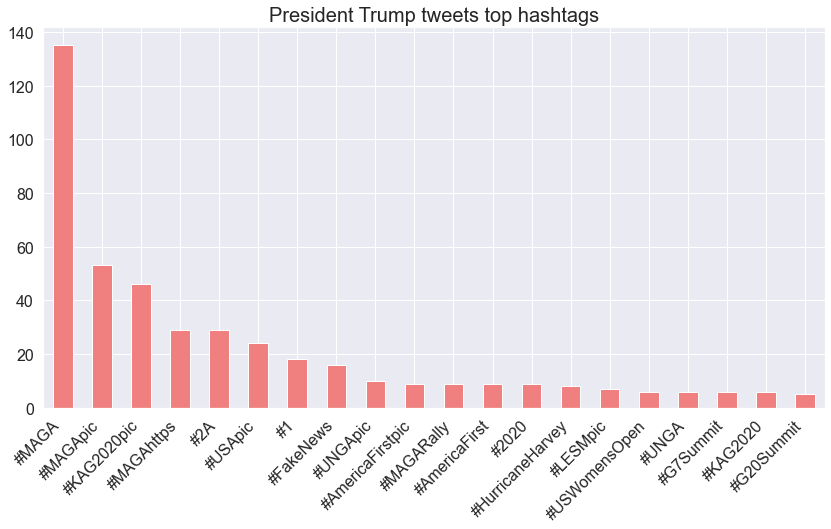

In [54]:
a = PTrump[pd.notna(PTrump['hashtags']) == True]
a = list(itertools.chain(a['hashtags'].map(lambda x: x.split(',') )))
flat_list = [item for sublist in a for item in sublist]
pd.Series(flat_list).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('President Trump tweets top hashtags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)

<AxesSubplot:>

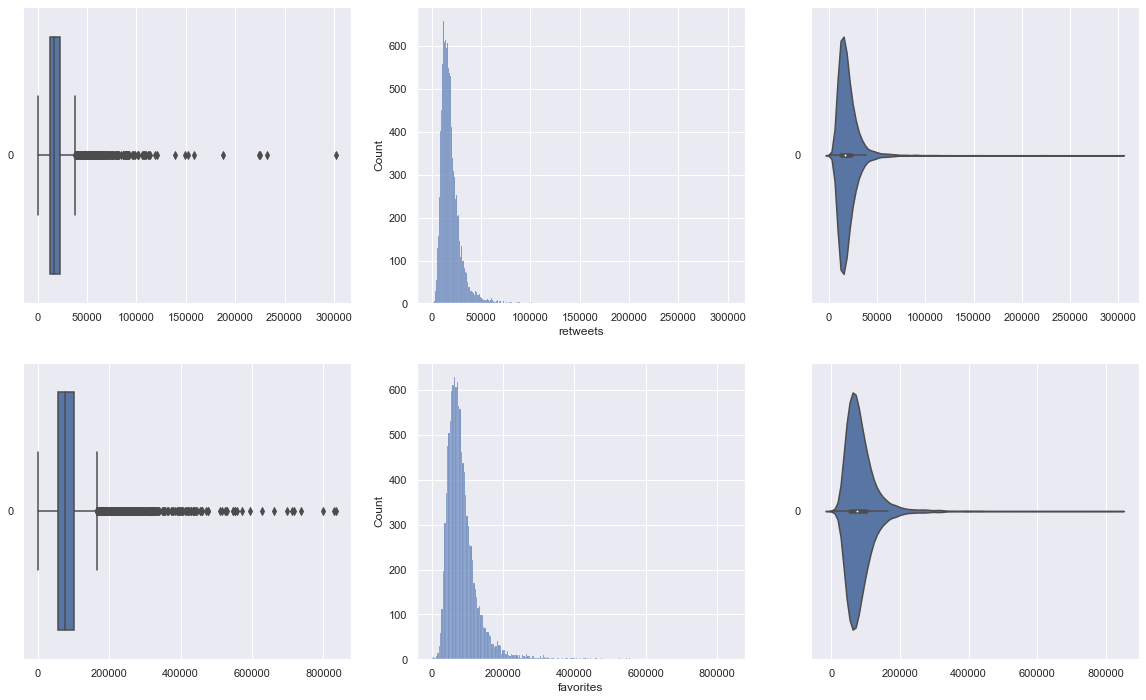

In [55]:
f, axes = plt.subplots(2, 3, figsize=(20, 12))

sb.boxplot(data = PTrump['retweets'], orient = "h", ax = axes[0,0])
sb.histplot(data = PTrump['retweets'], ax = axes[0,1])
sb.violinplot(data = PTrump['retweets'], orient = "h", ax = axes[0,2])

sb.boxplot(data = PTrump['favorites'], orient = "h", ax = axes[1,0])
sb.histplot(data = PTrump['favorites'], ax = axes[1,1])
sb.violinplot(data = PTrump['favorites'], orient = "h", ax = axes[1,2])

# ***S&P 500***

In [56]:
sp500 = pd.read_csv('https://raw.githubusercontent.com/calebczh/Trump-Tweets-and-Financial-Market-Relationship/main/Datasets/clean_sp500.csv')
sp500['Date'] = pd.to_datetime(sp500['Date']) #setting date to datetime data type
sp500 = sp500.set_index('Date')
sp500

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2009-05-04,879.210022,907.849976,879.210022,907.239990,907.239990,7038840000,NaN
2009-05-05,906.099976,907.700012,897.340027,903.799988,903.799988,6882860000,-0.003792
2009-05-06,903.950012,920.280029,903.950012,919.530029,919.530029,8555040000,0.017404
2009-05-07,919.580017,929.580017,901.359985,907.390015,907.390015,9120100000,-0.013202
2009-05-08,909.030029,930.169983,909.030029,929.229980,929.229980,8163280000,0.024069
...,...,...,...,...,...,...,...
2020-06-10,3213.419922,3223.270020,3181.489990,3190.139893,3190.139893,6570840000,-0.005313
2020-06-11,3123.530029,3123.530029,2999.489990,3002.100098,3002.100098,7018890000,-0.058944
2020-06-12,3071.040039,3088.419922,2984.469971,3041.310059,3041.310059,5832250000,0.013061


Text(0.5, 1.0, 'Market performance of S&P500')

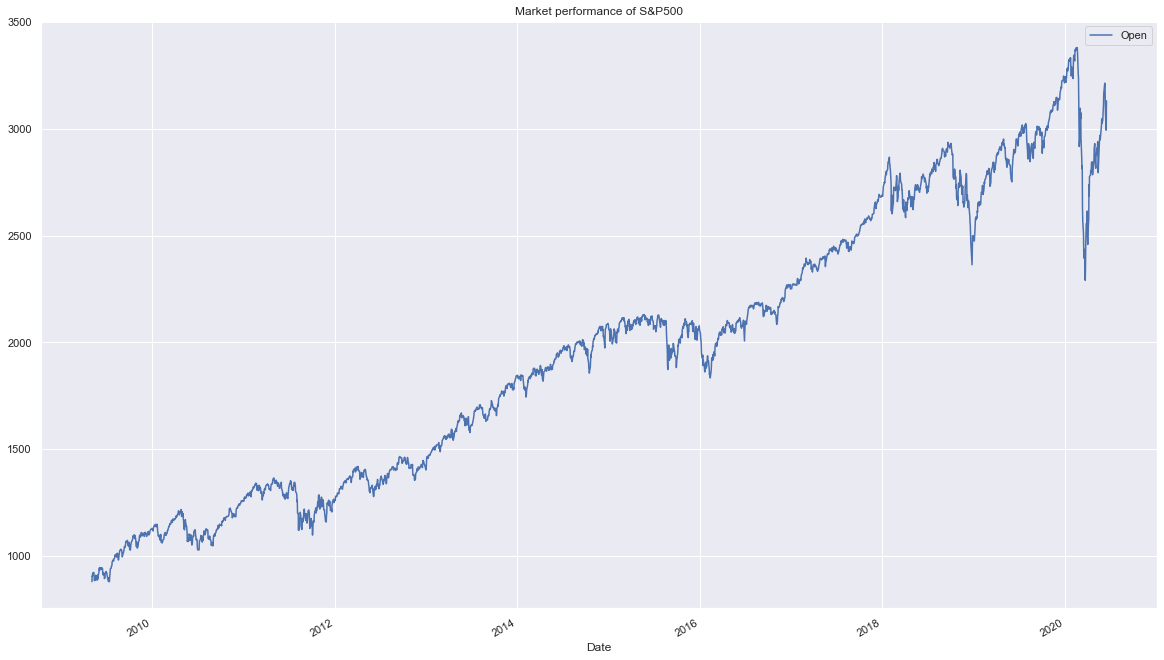

In [57]:
sp500['Open'].plot(label = 'Open', figsize = (20,12))
plt.legend()
plt.title("Market performance of S&P500")

As the open price is very volatile, we can use average in a number of days to better see a trend in the daily open price.

Text(0.5, 1.0, 'Market performance of S&P500')

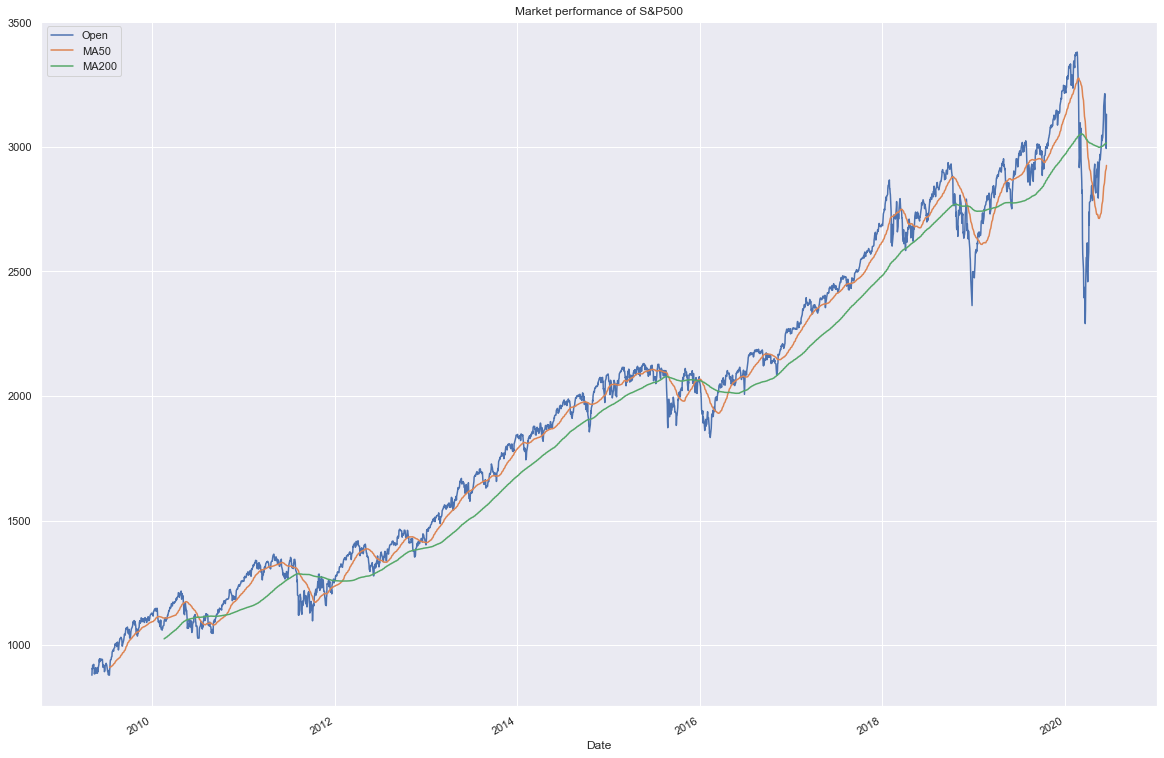

In [58]:
sp500['MA50'] = sp500['Open'].rolling(50).mean()
sp500['MA200'] = sp500['Open'].rolling(200).mean()
sp500['Open'].plot(figsize = (20,14))
sp500['MA50'].plot()
sp500['MA200'].plot()
plt.legend()
plt.title("Market performance of S&P500")

Text(0.5, 1.0, 'Market volume of S&P500')

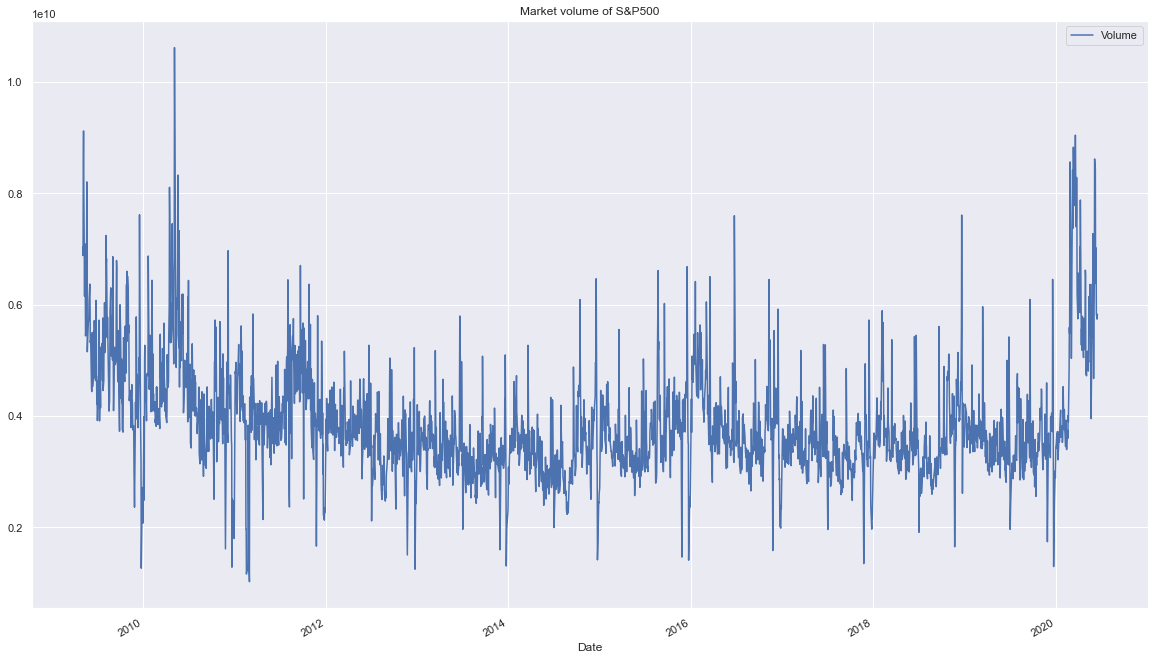

In [59]:
sp500['Volume'].plot(label = 'Volume', figsize = (20,12))
plt.legend()
plt.title("Market volume of S&P500")

Text(0.5, 1.0, 'Market volume of S&P500 (Period Average)')

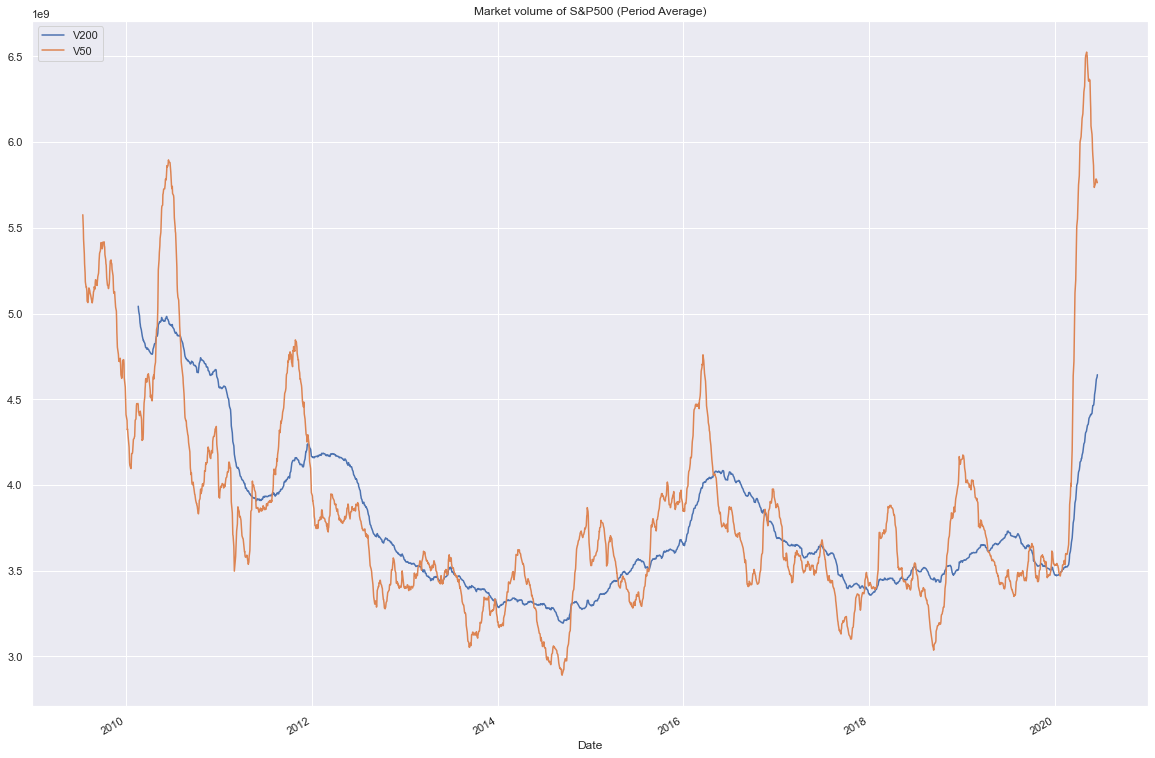

In [60]:
sp500['V50'] = sp500['Volume'].rolling(50).mean()
sp500['V200'] = sp500['Volume'].rolling(200).mean()
sp500['V200'].plot(figsize = (20,14))
sp500['V50'].plot()
plt.legend()
plt.title("Market volume of S&P500 (Period Average)")

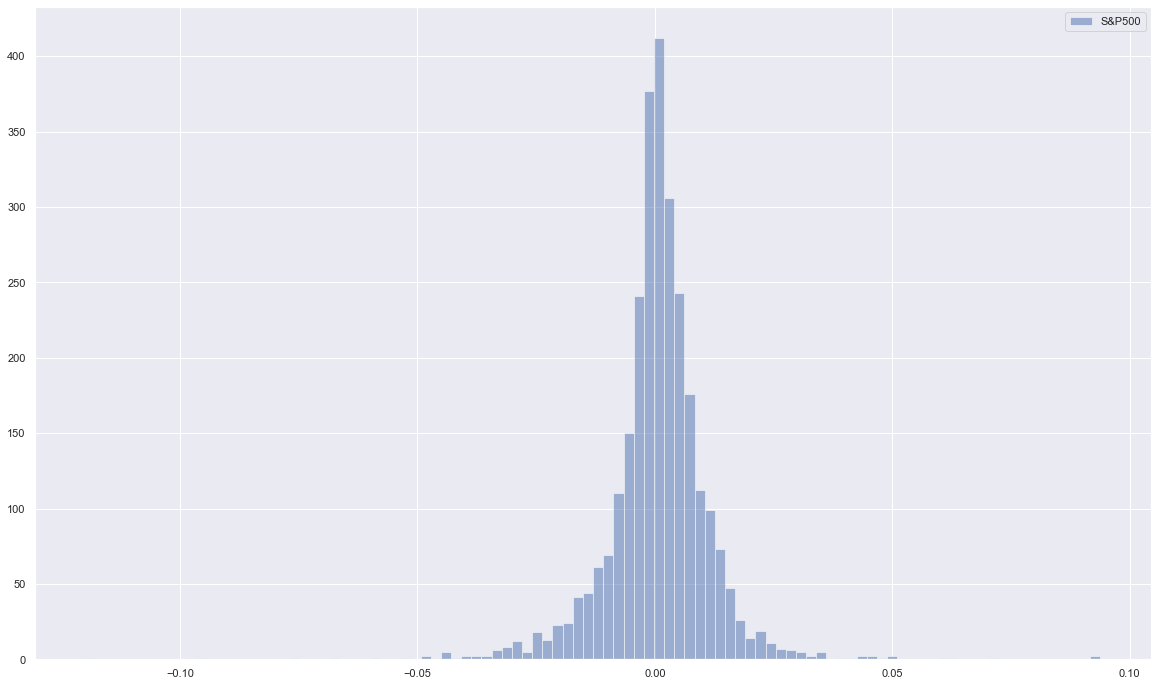

In [61]:
sp500['returns'].hist(bins = 100, label = 'S&P500', alpha = 0.5, figsize = (20,12))
plt.legend()

The distribution of daily returns of S&P 500 is very similar to that of a normal curve aboiut 0.00

# **Combining the data**
Combining the data sets by date

In [62]:
#shifting sp500 index up by 1, thus twitter post will have the same date as the performance of the market in the following day
sp500 = sp500.shift(-1, freq='D') 
sp500

,Open,High,Low,Close,Adj Close,Volume,returns,MA50,MA200,V50,V200
Date,,,,,,,,,,,
2009-05-03,879.210022,907.849976,879.210022,907.239990,907.239990,7038840000,NaN,NaN,NaN,NaN,NaN
2009-05-04,906.099976,907.700012,897.340027,903.799988,903.799988,6882860000,-0.003792,NaN,NaN,NaN,NaN
2009-05-05,903.950012,920.280029,903.950012,919.530029,919.530029,8555040000,0.017404,NaN,NaN,NaN,NaN
2009-05-06,919.580017,929.580017,901.359985,907.390015,907.390015,9120100000,-0.013202,NaN,NaN,NaN,NaN
2009-05-07,909.030029,930.169983,909.030029,929.229980,929.229980,8163280000,0.024069,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-09,3213.419922,3223.270020,3181.489990,3190.139893,3190.139893,6570840000,-0.005313,2880.882192,3011.654548,5.776352e+09,4.584556e+09
2020-06-10,3123.530029,3123.530029,2999.489990,3002.100098,3002.100098,7018890000,-0.058944,2891.058994,3012.938699,5.785364e+09,4.605362e+09
2020-06-11,3071.040039,3088.419922,2984.469971,3041.310059,3041.310059,5832250000,0.013061,2902.518193,3013.828199,5.783051e+09,4.616856e+09


In [63]:
#moved those tweets posted near the closing time or after the closing time of Nasdaq to the following day.
PTrump = PTrump.between_time('15:50', '00:00').shift(1, freq='D') 
PTrump

,content,retweets,favorites,mentions,hashtags,time,RA100,FA100
date,,,,,,,,
2017-01-21,It all begins today! I will see you at 11:00 A...,59617,238180,<NA>,NaN,06:31:53,15284.63,69666.28
2017-01-21,Today we are not merely transferring power fro...,17022,97230,<NA>,NaN,11:51:25,15281.89,70053.62
2017-01-21,"power from Washington, D.C. and giving it back...",15441,80281,<NA>,#InaugurationDay,11:51:58,15279.96,70369.04
2017-01-21,What truly matters is not which party controls...,36987,161112,<NA>,NaN,11:52:45,15470.17,71364.41
2017-01-21,"January 20th 2017, will be remembered as the d...",56418,201434,<NA>,NaN,11:53:17,15874.75,72814.62
...,...,...,...,...,...,...,...,...
2020-06-17,True! …,26783,154978,<NA>,NaN,20:16:20,26772.70,124367.27
2020-06-17,A GREAT woman. Her son is looking down from he...,26468,112140,<NA>,NaN,21:31:11,26663.54,123914.91
2020-06-17,96% Approval Rating in the Republican Party. T...,44472,313534,<NA>,NaN,22:27:56,26754.60,125595.68


In [64]:
P = PTrump.join(sp500)
#There exists days where the stock market is not open. We chose to drop these data from these dates.
P = P.dropna(subset=['Open']) 
P

,content,retweets,favorites,mentions,hashtags,time,RA100,FA100,Open,High,Low,Close,Adj Close,Volume,returns,MA50,MA200,V50,V200
2017-01-22,A fantastic day and evening in Washington D.C....,19831,158502,@FoxNews,NaN,05:53:41,16899.09,79357.92,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,3.152710e+09,-0.002690,2233.450400,2150.793353,3.755878e+09,3.677391e+09
2017-01-23,Had a great meeting at CIA Headquarters yester...,14153,113013,<NA>,NaN,06:35:09,16975.10,80069.98,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3.810960e+09,0.006565,2236.176797,2151.905052,3.706814e+09,3.679649e+09
2017-01-23,Watched protests yesterday but was under the i...,38039,186835,<NA>,NaN,06:47:21,17218.65,81356.93,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3.810960e+09,0.006565,2236.176797,2151.905052,3.706814e+09,3.679649e+09
2017-01-23,"Wow, television ratings just out: 31 million p...",33675,192297,<NA>,NaN,06:51:36,17404.21,82687.13,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3.810960e+09,0.006565,2236.176797,2151.905052,3.706814e+09,3.679649e+09
2017-01-23,Peaceful protests are a hallmark of our democr...,76233,353955,<NA>,NaN,08:23:17,18003.74,85502.69,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3.810960e+09,0.006565,2236.176797,2151.905052,3.706814e+09,3.679649e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15,…,26394,109146,<NA>,NaN,09:23:27,25133.29,115336.00,3131.000000,3153.449951,3076.060059,3124.739990,3124.739990,5.829240e+09,0.018962,2925.544194,3015.593749,5.763605e+09,4.643337e+09
2020-06-15,Does anyone notice how little the Radical Left...,50321,201626,<NA>,NaN,15:34:35,25463.98,116713.67,3131.000000,3153.449951,3076.060059,3124.739990,3124.739990,5.829240e+09,0.018962,2925.544194,3015.593749,5.763605e+09,4.643337e+09
2020-06-15,Interesting how ANTIFA and other Far Left mili...,69353,268924,<NA>,NaN,15:47:02,25960.87,118571.60,3131.000000,3153.449951,3076.060059,3124.739990,3124.739990,5.829240e+09,0.018962,2925.544194,3015.593749,5.763605e+09,4.643337e+09
2020-06-15,THE SILENT MAJORITY IS STRONGER THAN EVER!!!,87908,476256,<NA>,NaN,16:54:50,26555.85,122079.38,3131.000000,3153.449951,3076.060059,3124.739990,3124.739990,5.829240e+09,0.018962,2925.544194,3015.593749,5.763605e+09,4.643337e+09


# **Combined Data EDA**

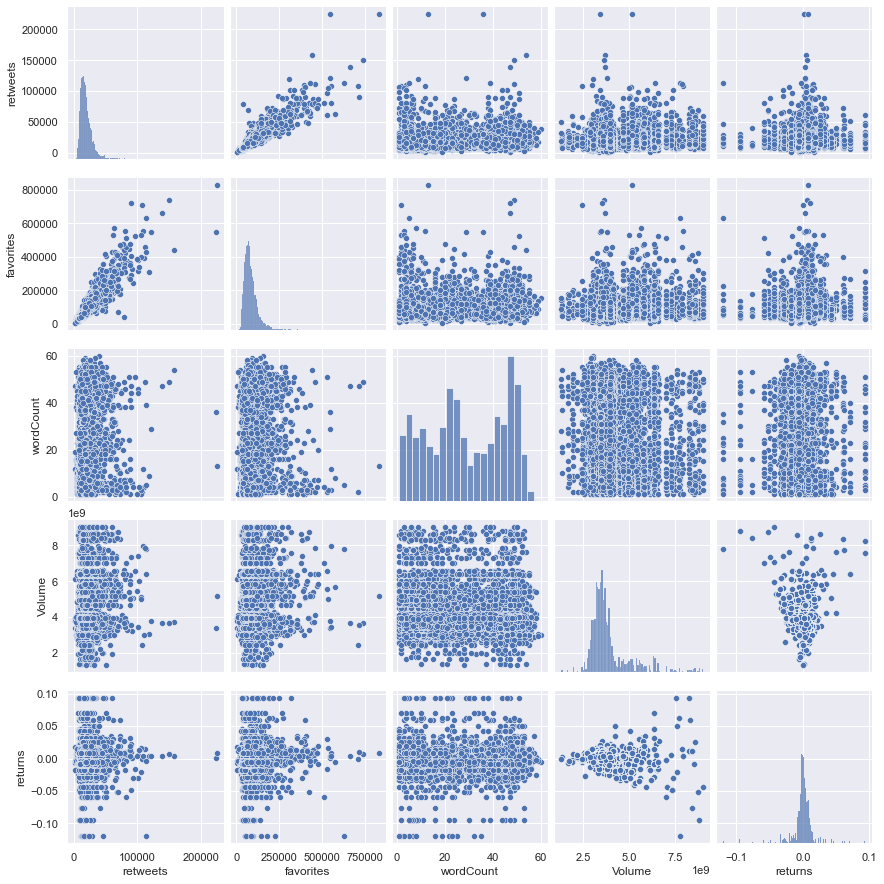

In [65]:
P['wordCount'] = P['content'].map(lambda x: len(x.split()))
temp = P[['retweets', 'favorites', 'wordCount', 'Volume', 'returns']]
sb.pairplot(data = temp)

In [66]:
P = P.drop(['time', 'RA100','FA100','V50','V200','Open','High','Low','Close','Adj Close','MA50', 'MA200'], axis = 1)
P

,content,retweets,favorites,mentions,hashtags,Volume,returns,wordCount
2017-01-22,A fantastic day and evening in Washington D.C....,19831,158502,@FoxNews,NaN,3.152710e+09,-0.002690,23
2017-01-23,Had a great meeting at CIA Headquarters yester...,14153,113013,<NA>,NaN,3.810960e+09,0.006565,21
2017-01-23,Watched protests yesterday but was under the i...,38039,186835,<NA>,NaN,3.810960e+09,0.006565,23
2017-01-23,"Wow, television ratings just out: 31 million p...",33675,192297,<NA>,NaN,3.810960e+09,0.006565,23
2017-01-23,Peaceful protests are a hallmark of our democr...,76233,353955,<NA>,NaN,3.810960e+09,0.006565,24
...,...,...,...,...,...,...,...,...
2020-06-15,…,26394,109146,<NA>,NaN,5.829240e+09,0.018962,1
2020-06-15,Does anyone notice how little the Radical Left...,50321,201626,<NA>,NaN,5.829240e+09,0.018962,47
2020-06-15,Interesting how ANTIFA and other Far Left mili...,69353,268924,<NA>,NaN,5.829240e+09,0.018962,48
2020-06-15,THE SILENT MAJORITY IS STRONGER THAN EVER!!!,87908,476256,<NA>,NaN,5.829240e+09,0.018962,7
